In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from __future__ import print_function, division
import numpy as np
import os
import os.path as path
from os import listdir 
from os.path import isfile, join
import copy
import matplotlib.pyplot as plt

In [5]:
# path
cwd = os.getcwd()
parts = cwd.split('/scripts/pretrained')
ROOT = parts[0]
os.chdir(ROOT)
import sys
sys.path.insert(0, ROOT)

In [6]:
choice = 'results_provided'

# uncomment this line if you want to check your own results
# choice = 'results'

results_folder = join(ROOT, 'data', 'pretrained',  choice, 'hunchback_trained')

In [7]:
def get_color(arch):
    #print(arch)
    if 'alex' in arch:
        color = 'r'
    if 'vgg' in arch:
        color = 'b'
    if 'bn' in arch:
        color = 'k'
    if 'res' in arch:
        color = 'g'
    if 'dense' in arch:
        color = 'm'
    if 'squeeze' in arch:
        color = 'y'
    return color   

def get_sym_arch(arch):
    #print(arch)
    if 'alex' in arch:
        sym_arch = 'o'
    if 'vgg' in arch:
        sym_arch = 'o'
    if 'bn' in arch:
        sym_arch = 'p'
    if 'res' in arch:
        sym_arch = 's'
    if 'dense' in arch:
        sym_arch = 'H'
    if 'squeeze' in arch:
        sym_arch = '1'
    return sym_arch   

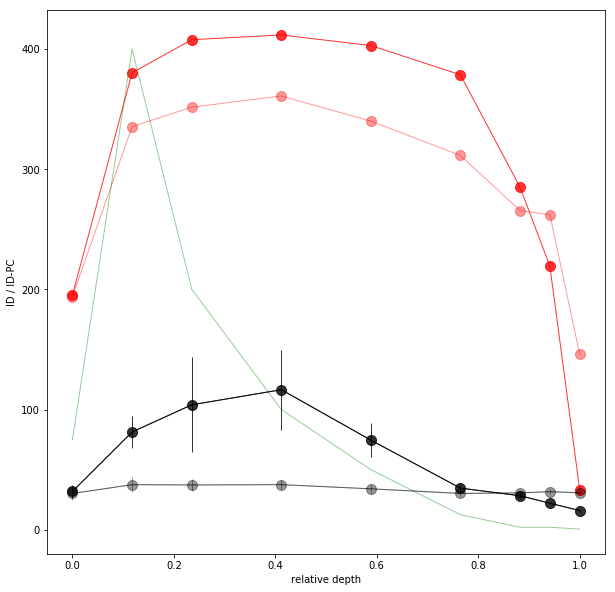

In [11]:
archs = ['vgg16']
train = [True,False]
fs=10
fs2=10
ms=10
lw=1
lw2=1
fig=plt.figure(figsize=(10,10))
for t in train:
    if t == True:
        tag = 'trained'
        alpha = 0.8
        results_folder = join(ROOT, 'data', 'pretrained', choice, 'hunchback_trained')
    else:
        tag = 'not trained'
        alpha = 0.4
        results_folder = join(ROOT, 'data', 'pretrained', choice, 'hunchback_untrained')
        
    ID = {}
    for arch in archs:
        ID[arch] = np.load(join(results_folder, arch + '_ID.npy'))     
    IDerr = {}
    for arch in archs:
        IDerr[arch] = np.load(join(results_folder, arch + '_IDerr.npy'))      
    PCA_DIM = {}
    for arch in archs:
        PCA_DIM[arch] = np.load(join(results_folder, arch + '_PCA_DIM.npy'))      
    Depths = {}
    for arch in archs:
        Depths[arch] = np.load(join(results_folder, arch + '_depths.npy'))      
    Embdims = {}
    for arch in archs:
        Embdims[arch] = np.load(join(results_folder, arch + '_embdims.npy'))  
        

    for i,arch in enumerate(archs):
        nlayers = ID[arch].shape[1]

        embdims = Embdims[arch][0:nlayers]/np.max(Embdims[arch][0:nlayers])
        rdepths = Depths[arch]/Depths[arch][-1]

    
        plt.plot(rdepths, np.mean(ID[arch][0:-1,:],0), '-ko', markersize=ms, linewidth=lw, alpha=alpha, label= 'ID ' + tag)
        plt.errorbar(rdepths, np.mean(ID[arch][0:-1,:],0), 
                     yerr=np.std(ID[arch][0:-1,:],0), fmt='-k', linewidth=lw, alpha=alpha)
        plt.plot(rdepths, np.mean(PCA_DIM[arch][0:-1,:],0), '-ro', markersize=ms,linewidth=lw, alpha=alpha,label='ID-PC ' + tag)
        
        if t == True:
            plt.plot(rdepths, embdims*400, '-g', linewidth=lw, markersize=ms,
                     alpha=0.4,label='ED (normalized)')

plt.xlabel('relative depth')
plt.ylabel('ID / ID-PC')
fname = 'Fig5_C'
plt.savefig(join(results_folder, fname + '.png') )